In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Black Friday Sales Prediction\Train.csv")
test = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Black Friday Sales Prediction\Test.csv")

In [3]:
print(train.shape)
train.head()

(550068, 12)


User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
print(test.shape)
test.head()

(233599, 11)


User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [7]:
#Training Data cleaning
train = train.fillna(0)
train[['Product_Category_2']] = train[['Product_Category_2']].astype(int)
train[['Product_Category_3']] = train[['Product_Category_3']].astype(int)
train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                   0                   0      8370  
1                   6                  14     15200  
2                   0                   0      1422  
3                  14                   0      1057  
4                   0                   0      7969

In [8]:
#Test Data cleaning
test = test.fillna(0)
test[['Product_Category_2']] = test[['Product_Category_2']].astype(int)
test[['Product_Category_3']] = test[['Product_Category_3']].astype(int)
test.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                  11                   0  
1                   5                   0  
2                  14                   0  
3                   9                   0  
4                   5                  12

In [9]:
train.drop("User_ID", axis = 1, inplace = True)
test.drop("User_ID", axis = 1, inplace = True)

train.drop("Product_ID", axis = 1, inplace = True)
test.drop("Product_ID", axis = 1, inplace = True)

In [10]:
df = pd.concat([train, test], ignore_index = True, axis = 0).reset_index(drop = True)
print(train.shape, test.shape, df.shape)

(550068, 10) (233599, 9) (783667, 10)


In [11]:
print(df.shape)
df.head()

(783667, 10)


Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   0                   0   
1               0                   1                   6                  14   
2               0                  12                   0                   0   
3               0                  12                  14                   0   
4               0                   8                   0                   0   

   Purchase  
0    8370.0  
1   15200.0  
2    1422.0  
3    1057.0  
4    7969.0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  int32  
 8   Product_Category_3          783667 non-null  int32  
 9   Purchase                    550068 non-null  float64
dtypes: float64(1), int32(2), int64(3), object(4)
memory usage: 53.8+ MB


In [13]:
df.dropna(how = 'any').shape

(550068, 10)

In [14]:
df.duplicated().sum()

147232

In [15]:
df.drop_duplicates(keep = 'first').shape

(636435, 10)

In [16]:
df.drop_duplicates(keep = False).shape

(595308, 10)

In [17]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [18]:
df.dropna(subset = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'], how = 'any').shape

(550068, 10)

In [19]:
df.isnull()

Gender    Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0        False  False       False          False                       False   
1        False  False       False          False                       False   
2        False  False       False          False                       False   
3        False  False       False          False                       False   
4        False  False       False          False                       False   
...        ...    ...         ...            ...                         ...   
783662   False  False       False          False                       False   
783663   False  False       False          False                       False   
783664   False  False       False          False                       False   
783665   False  False       False          False                       False   
783666   False  False       False          False                       False   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                False               False               False   
1                False               False               False   
2                False               False               False   
3                False               False               False   
4                False               False               False   
...                ...                 ...                 ...   
783662           False               False               False   
783663           False               False               False   
783664           False               False               False   
783665           False               False               False   
783666           False               False               False   

        Product_Category_3  Purchase  
0                    False     False  
1                    False     False  
2                    False     False  
3                    False     False  
4                    False     False  
...                    ...       ...  
783662               False      True  
783663               False      True  
783664               False      True  
783665               False      True  
783666               False      True  

[783667 rows x 10 columns]

In [20]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [21]:
df["Product_Category_2"].fillna(method = 'ffill', inplace = True)
df["Product_Category_3"].fillna(method = 'ffill', inplace = True)
df["Purchase"].fillna(method = 'ffill', inplace = True)
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   0                   0   
1               0                   1                   6                  14   
2               0                  12                   0                   0   
3               0                  12                  14                   0   
4               0                   8                   0                   0   

   Purchase  
0    8370.0  
1   15200.0  
2    1422.0  
3    1057.0  
4    7969.0

In [22]:
df.apply(lambda x: x.dtype)

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2              int32
Product_Category_3              int32
Purchase                      float64
dtype: object

In [23]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

In [24]:
#Checking for percentage of missing values in each columns
(df.isnull().sum()/len(df))*100

Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

In [25]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

Total missing  % missing
Gender                  0        0.0
Age                     0        0.0
Occupation              0        0.0

In [26]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique())

Unique Values for Each Feature: 

Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 20
Product_Category_2 : 18
Product_Category_3 : 16
Purchase : 18105


In [27]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Gender
['F' 'M']
Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category
['A' 'C' 'B']
Stay_In_Current_City_Years
['2' '4+' '3' '1' '0']


In [28]:
numerical_data = df.select_dtypes(include=np.number)
numerical_col = numerical_data.columns 

print("Numeric Features:")
print(numerical_data.head())
print("===="*20)

Numeric Features:
   Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0          10               0                   3                   0   
1          10               0                   1                   6   
2          10               0                  12                   0   
3          10               0                  12                  14   
4          16               0                   8                   0   

   Product_Category_3  Purchase  
0                   0    8370.0  
1                  14   15200.0  
2                   0    1422.0  
3                   0    1057.0  
4                   0    7969.0  


In [29]:
categorical_data = df.select_dtypes(exclude=np.number) 
categorical_col = categorical_data.columns

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
  Gender   Age City_Category Stay_In_Current_City_Years
0      F  0-17             A                          2
1      F  0-17             A                          2
2      F  0-17             A                          2
3      F  0-17             A                          2
4      M   55+             C                         4+


In [30]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [31]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  6


In [32]:
#Discrete Numerical Features
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [33]:
#Continuous Numerical Features
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 1


In [35]:
df.describe()

Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
count  783667.000000   783667.000000       783667.000000       783667.000000   
mean        8.079300        0.409777            5.366196            6.754454   
std         6.522206        0.491793            3.878160            6.216205   
min         0.000000        0.000000            1.000000            0.000000   
25%         2.000000        0.000000            1.000000            0.000000   
50%         7.000000        0.000000            5.000000            5.000000   
75%        14.000000        1.000000            8.000000           14.000000   
max        20.000000        1.000000           20.000000           18.000000   

       Product_Category_3       Purchase  
count       783667.000000  783667.000000  
mean             3.845165    6648.584478  
std              6.252476    5815.258873  
min              0.000000      12.000000  
25%              0.000000     490.000000  
50%              0.000000    6062.000000  
75%              8.000000    9927.000000  
max             18.000000   23961.000000

In [36]:
df.corr()

Occupation  Marital_Status  Product_Category_1  \
Occupation            1.000000        0.023563           -0.008441   
Marital_Status        0.023563        1.000000            0.019579   
Product_Category_1   -0.008441        0.019579            1.000000   
Product_Category_2    0.007424        0.003337           -0.058544   
Product_Category_3    0.012623       -0.005300           -0.386535   
Purchase              0.012211       -0.000549           -0.201108   

                    Product_Category_2  Product_Category_3  Purchase  
Occupation                    0.007424            0.012623  0.012211  
Marital_Status                0.003337           -0.005300 -0.000549  
Product_Category_1           -0.058544           -0.386535 -0.201108  
Product_Category_2            1.000000            0.092523  0.028458  
Product_Category_3            0.092523            1.000000  0.174321  
Purchase                      0.028458            0.174321  1.000000

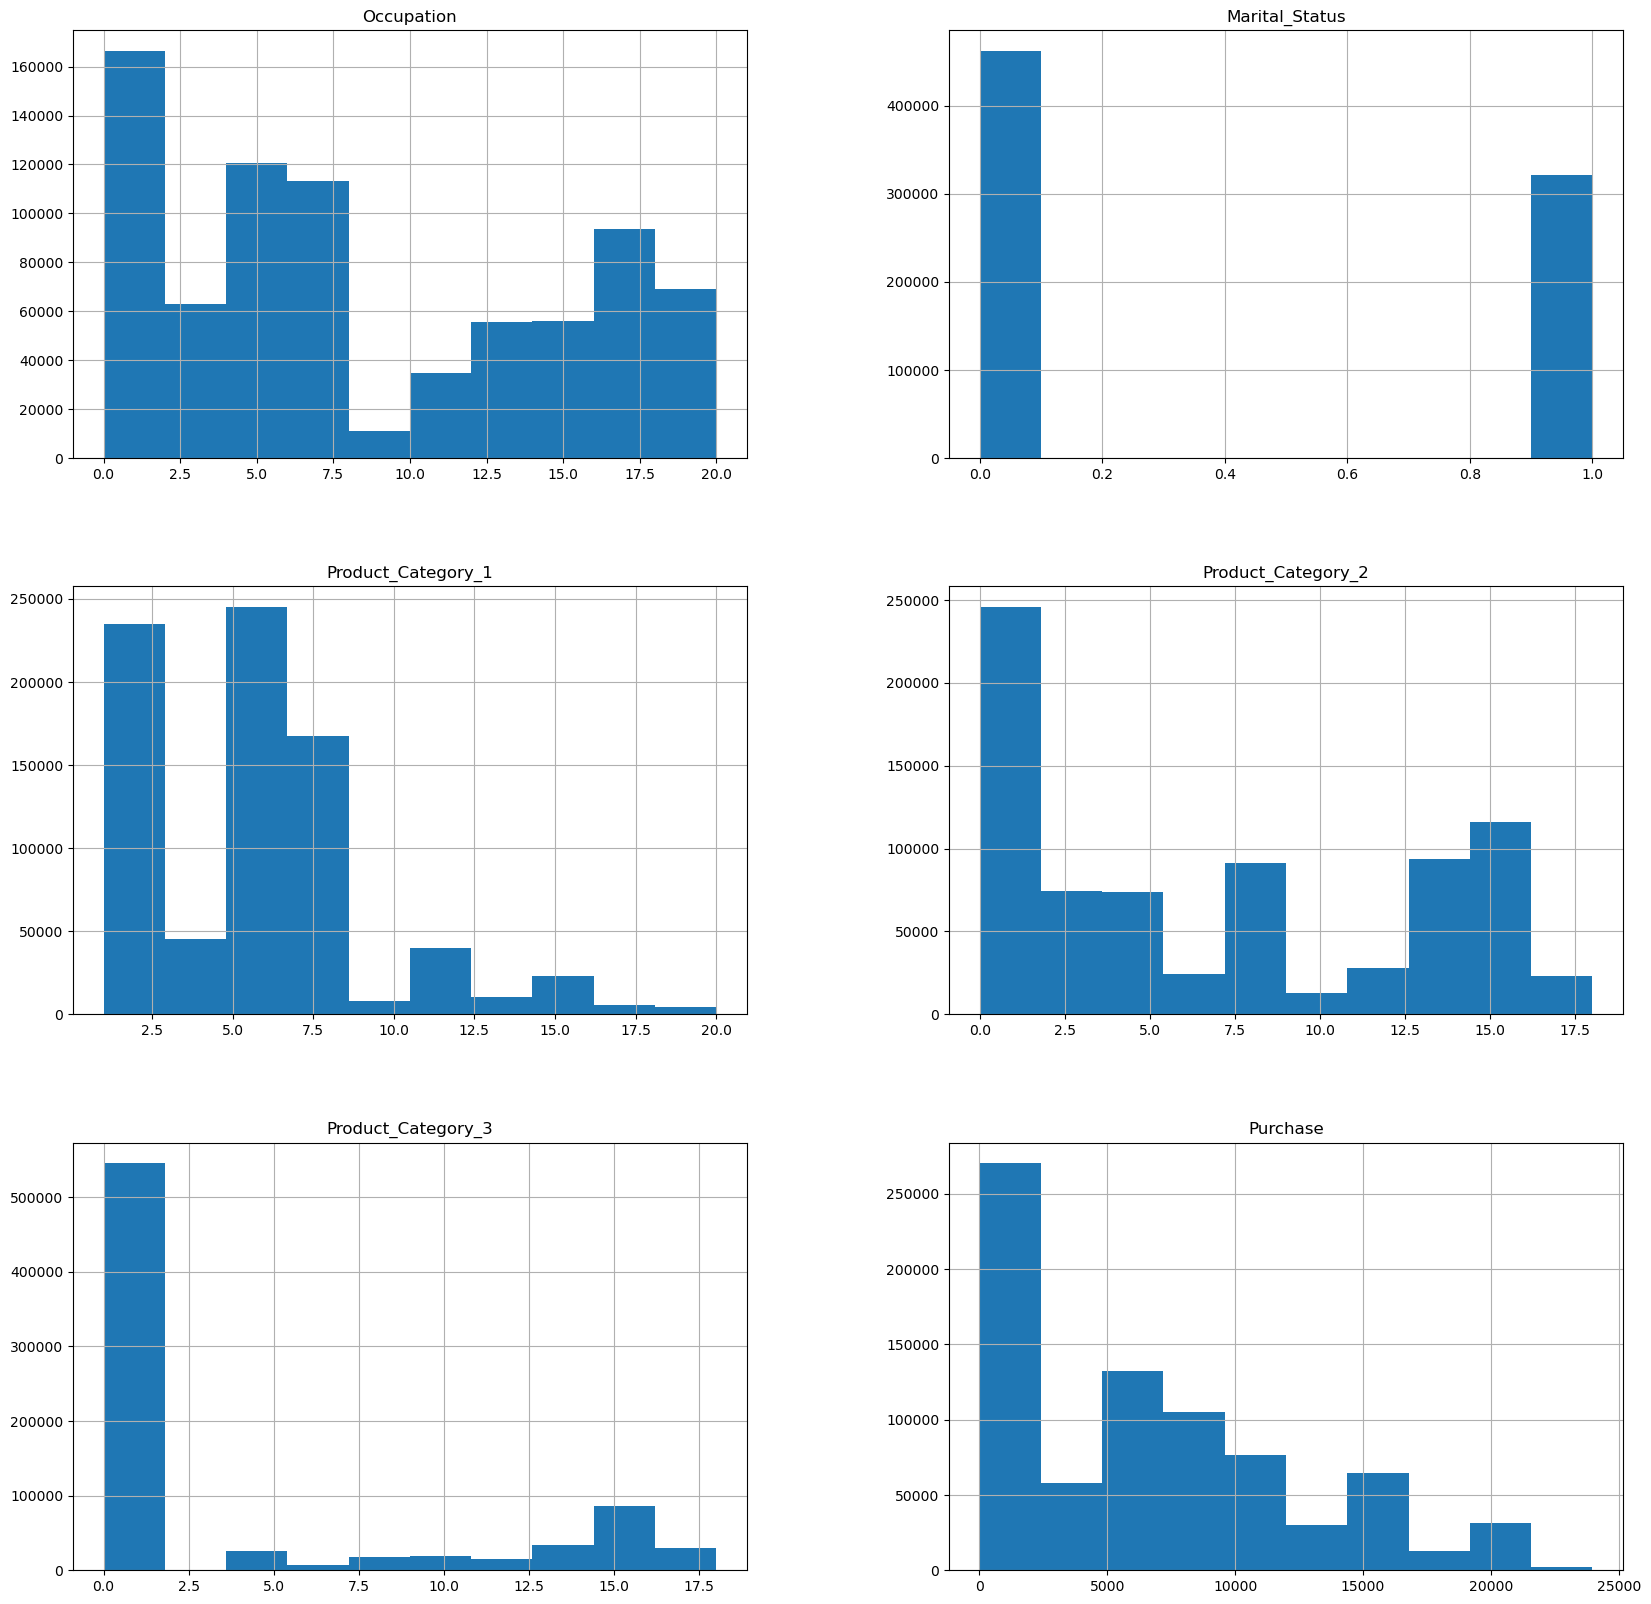

In [37]:
df.hist(figsize=(20,20))
plt.show()

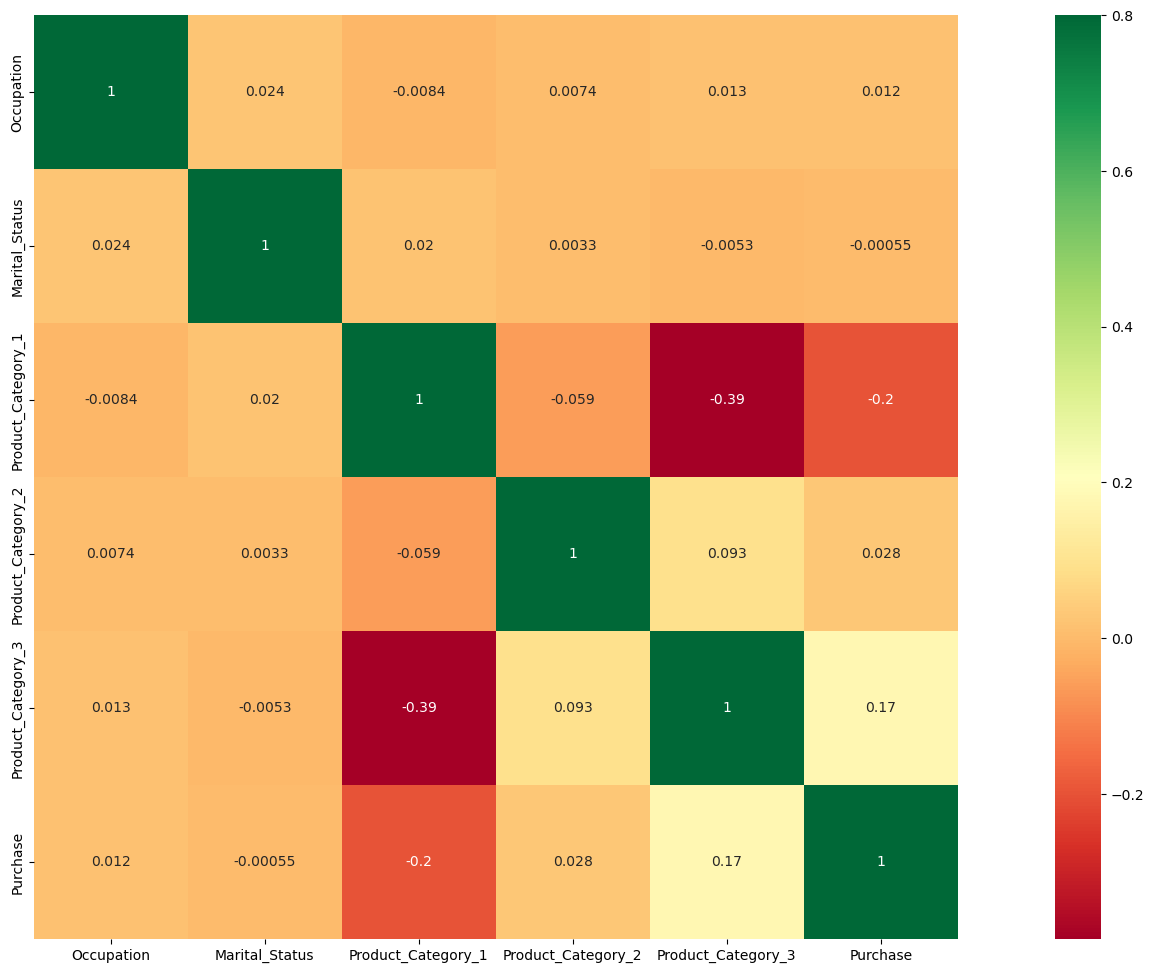

In [38]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

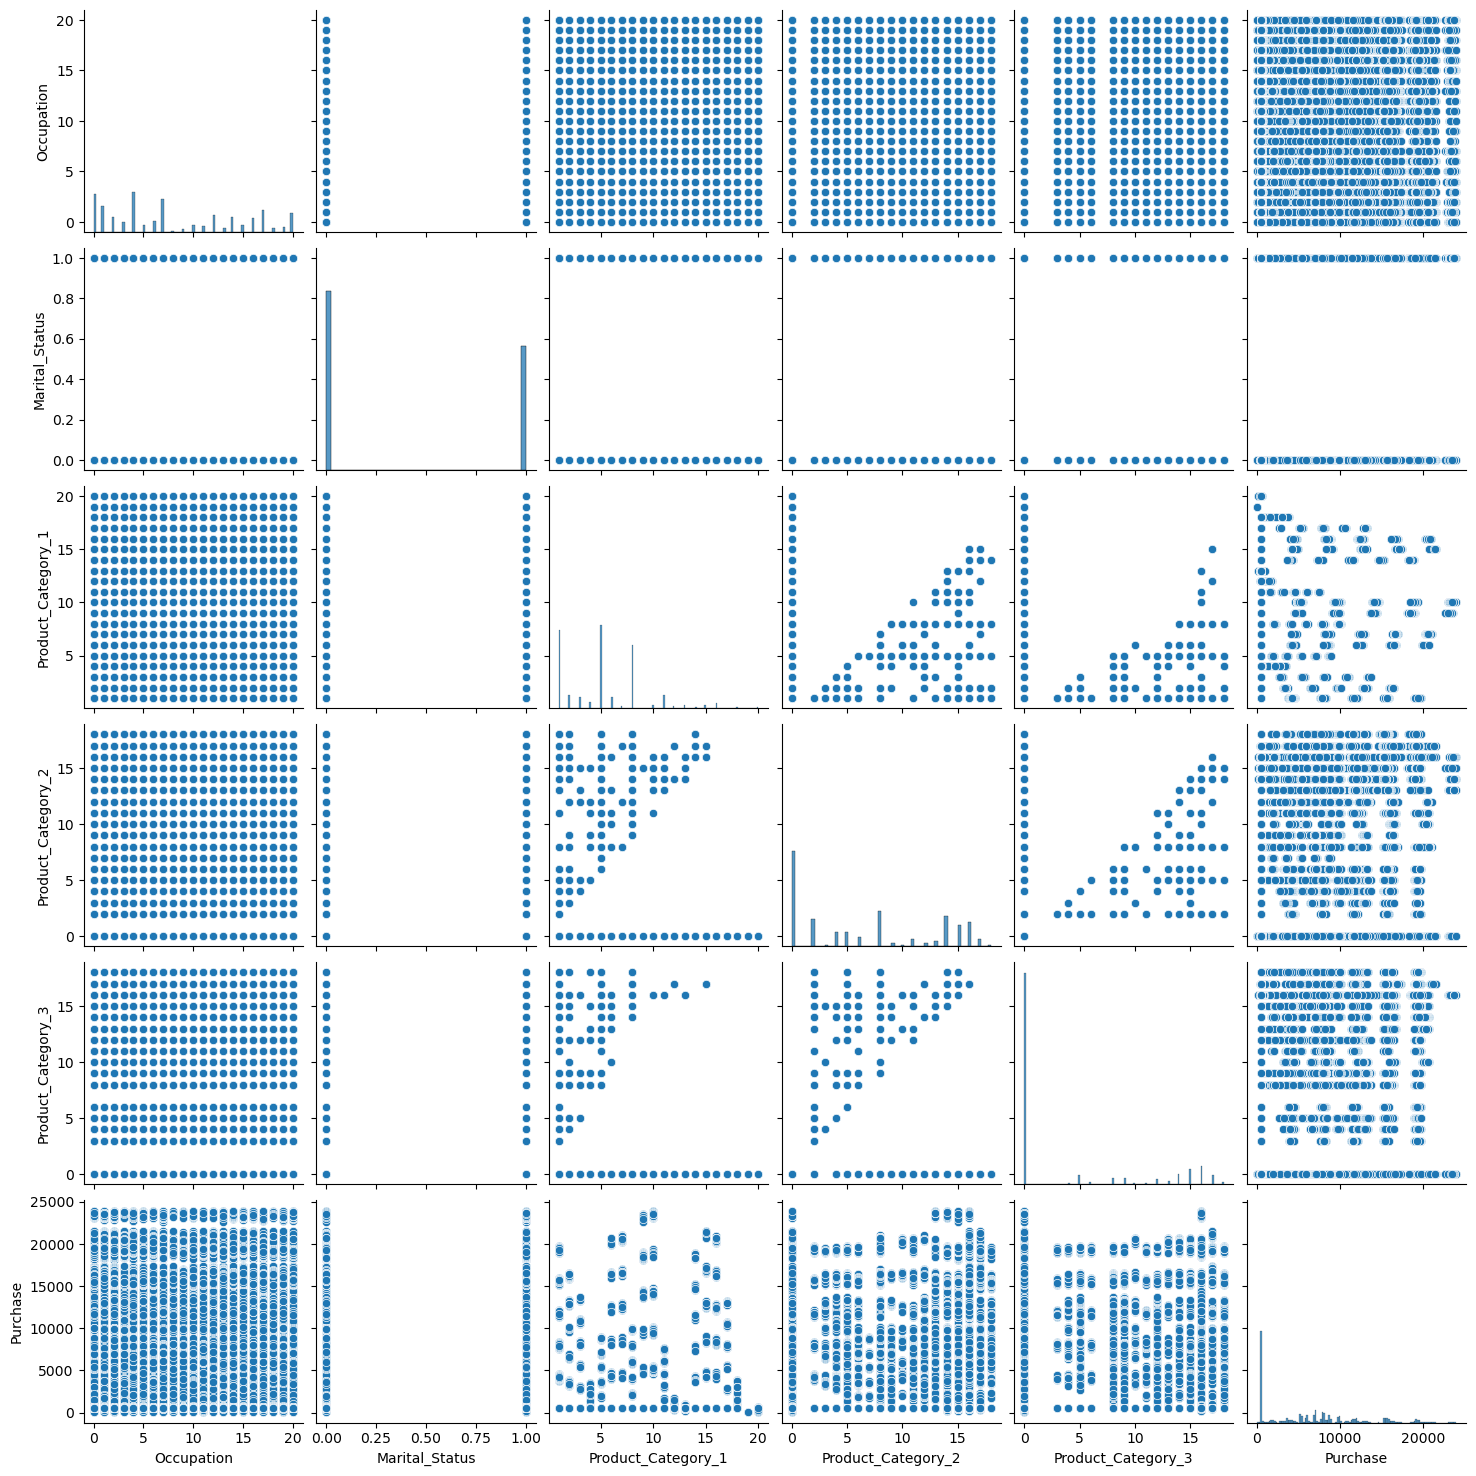

In [39]:
sns.pairplot(df)

In [40]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,
            color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

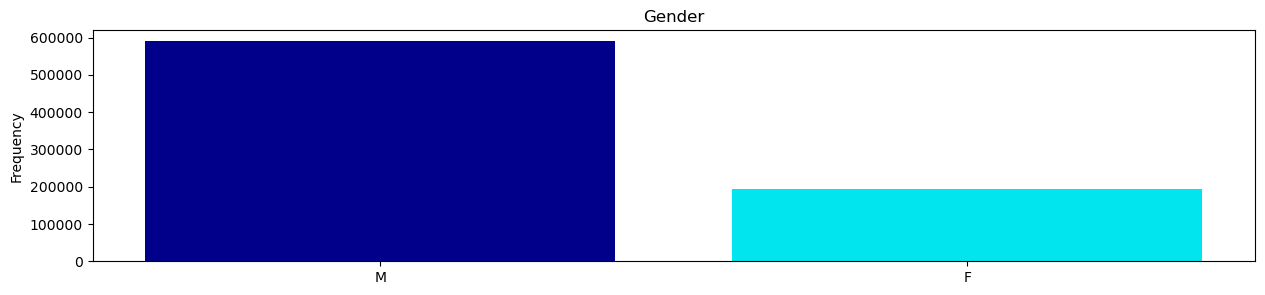

Gender: 
 M    590031
F    193636
Name: Gender, dtype: int64


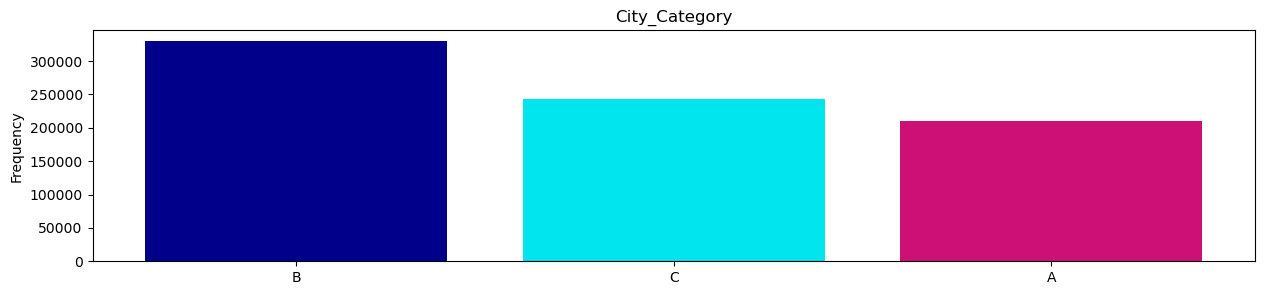

City_Category: 
 B    329739
C    243684
A    210244
Name: City_Category, dtype: int64


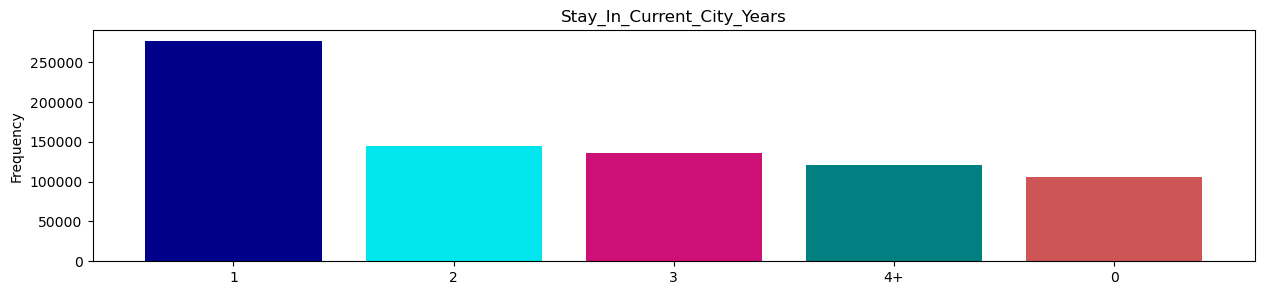

Stay_In_Current_City_Years: 
 1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64


In [41]:
categorical_cols = ['Gender', 'City_Category', 'Stay_In_Current_City_Years']
for c in categorical_cols:
    bar_plot(c)

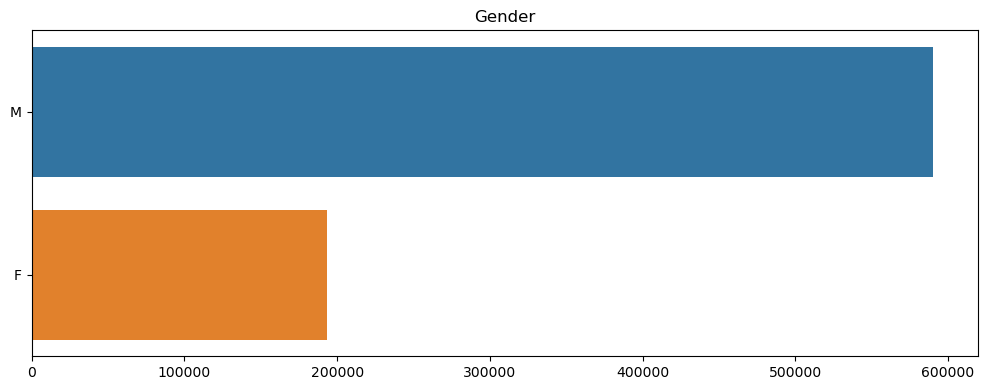

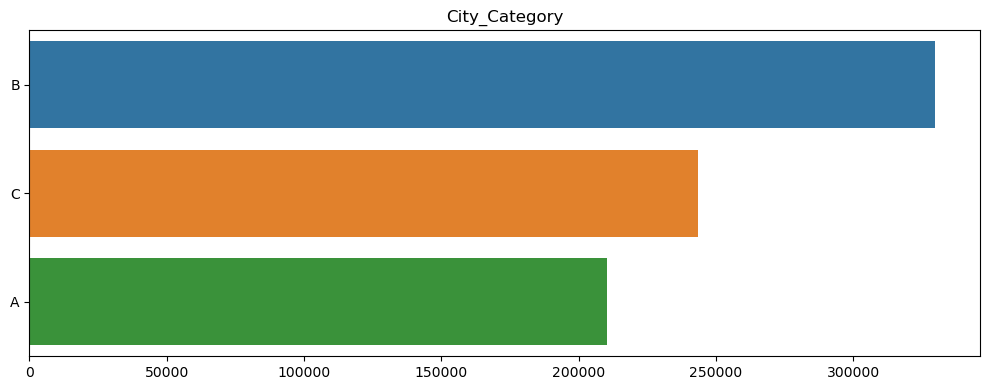

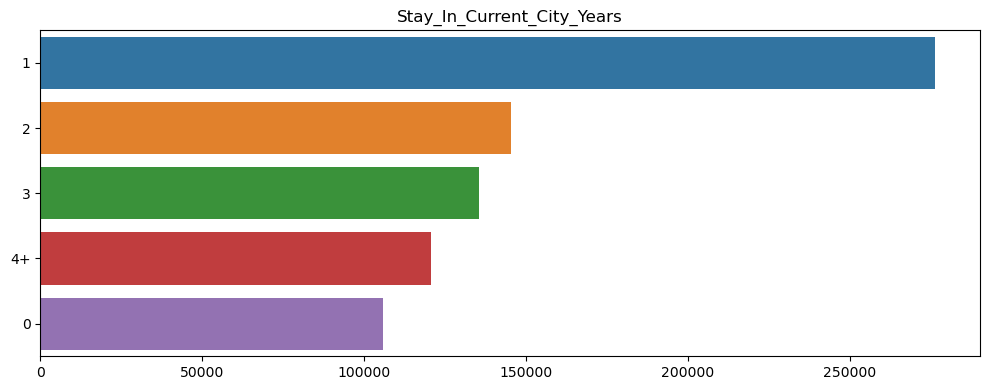

In [42]:
categorcial_variables = ['Gender', 'City_Category', 'Stay_In_Current_City_Years']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

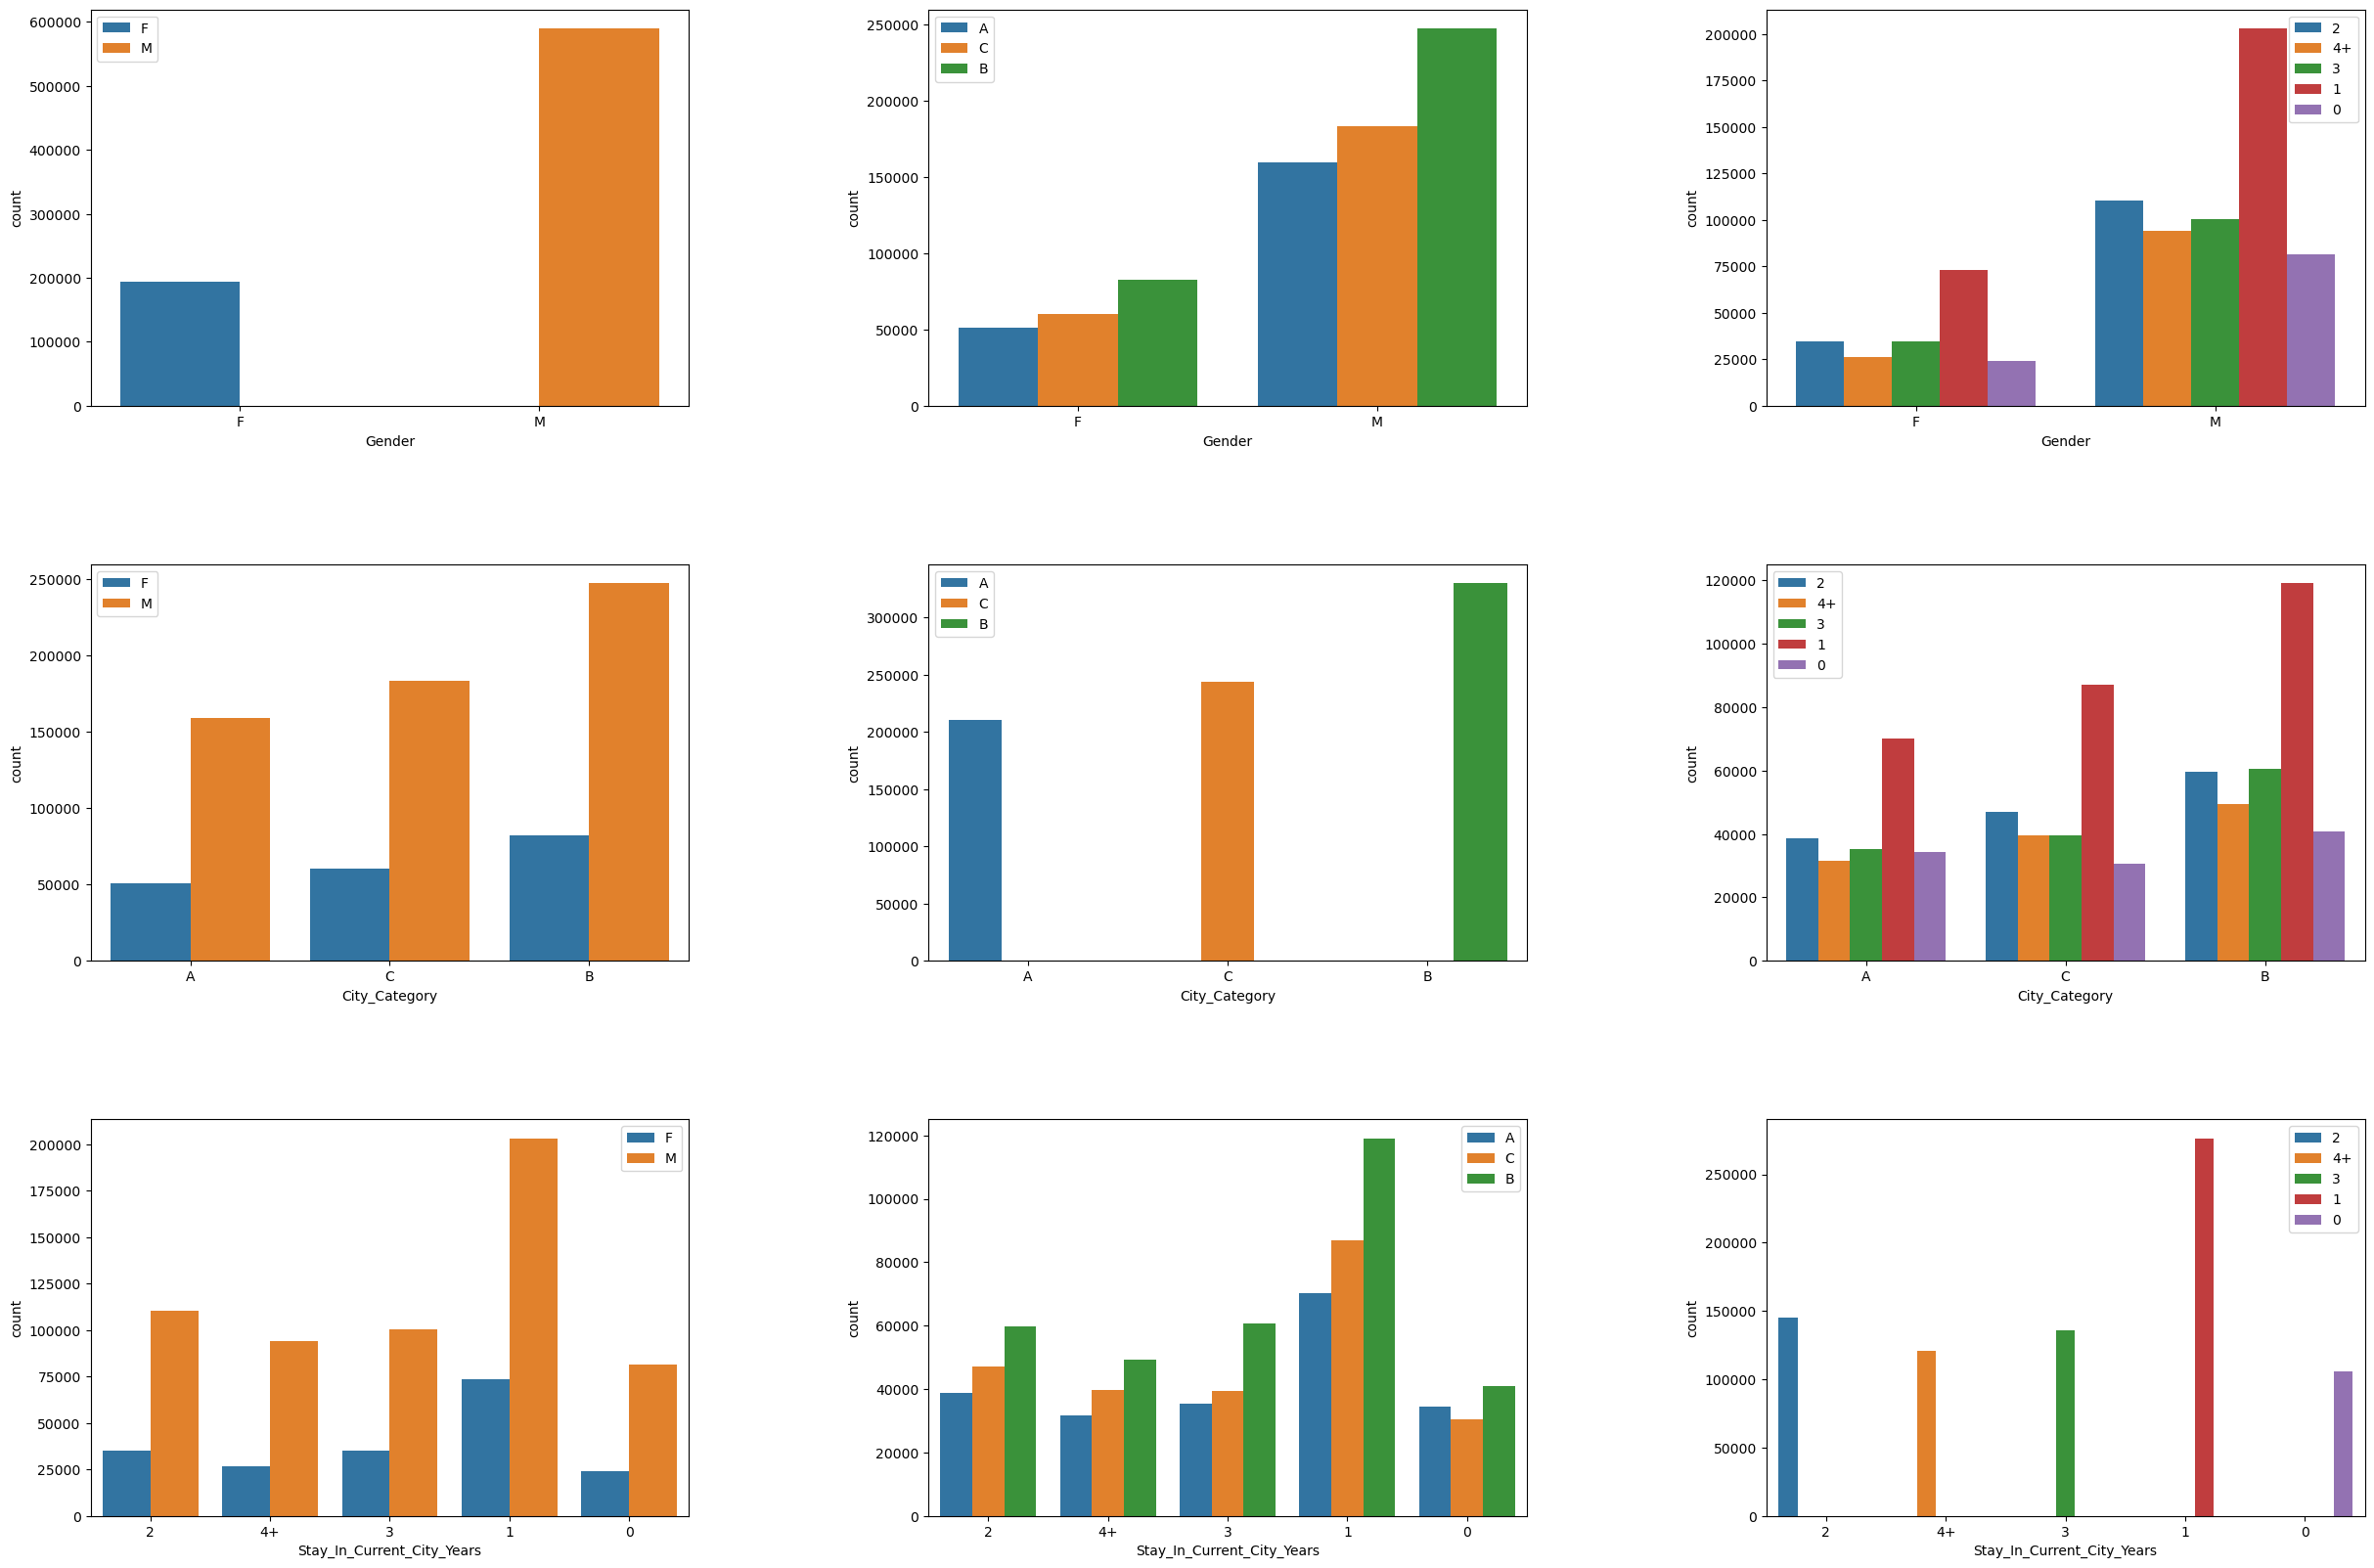

In [43]:
columns = ['Gender', 'City_Category', 'Stay_In_Current_City_Years']
fig = plt.figure(figsize = (30, 20))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, (len(columns)**2)+1):
    ax = fig.add_subplot(len(columns), len(columns), i)
    ax = sns.countplot(df[columns[int((i-1)/len(columns))]],hue = columns[((i-1)%len(columns))],
                       data = df)
    ax = plt.legend(loc = 'best')

plt.show()

In [44]:
cat_col = ['Gender', 'City_Category', 'Stay_In_Current_City_Years']
num_col = ['Age', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 
           'Product_Category_3', 'Purchase']

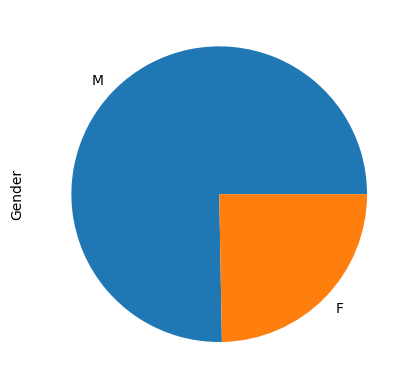

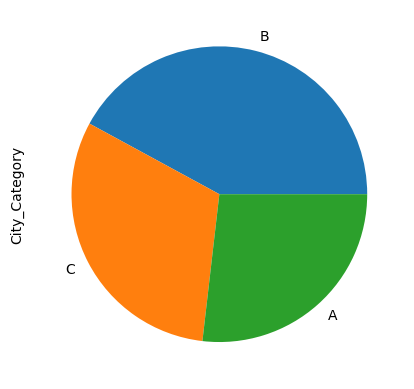

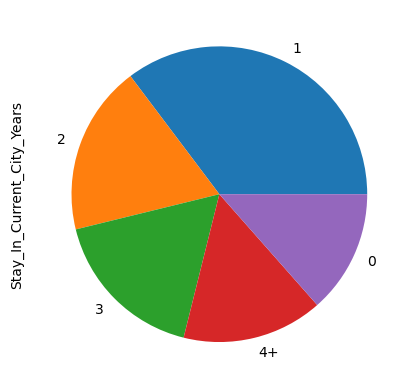

In [45]:
for col in cat_col : 
    plt.figure()
    df[col].value_counts().plot.pie()

In [46]:
def Count_categorcial_variables(df):
    categorcial_variables = df.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(categorcial_variables):
        print("------------",col," value counts---------------------")
        print(df[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in categorcial_variables:
        a = df[i].unique()
        print("There are {} categories in {}".format(len(a),i))
Count_categorcial_variables(df)

------------ Gender  value counts---------------------
M    590031
F    193636
Name: Gender, dtype: int64
------------ Age  value counts---------------------
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
------------ City_Category  value counts---------------------
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64
------------ Stay_In_Current_City_Years  value counts---------------------
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64


------------Number of categories in each columns---------------------
There are 2 categories in Gender
There are 7 categories in Age
There are 3 categories in City_Category
There are 5 categories in Stay_In_Current_City_Years


# Univariate Analysis

In [47]:
df['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Gender'>

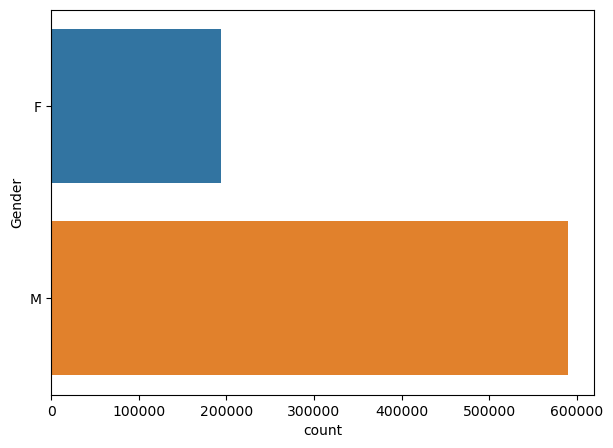

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Gender'])

<AxesSubplot:ylabel='Gender'>

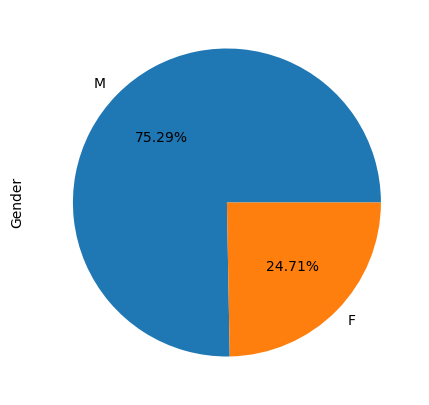

In [49]:
plt.figure(figsize=(7,5))
df['Gender'].value_counts().plot.pie(autopct="%0.2f%%")

In [50]:
df['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Age'>

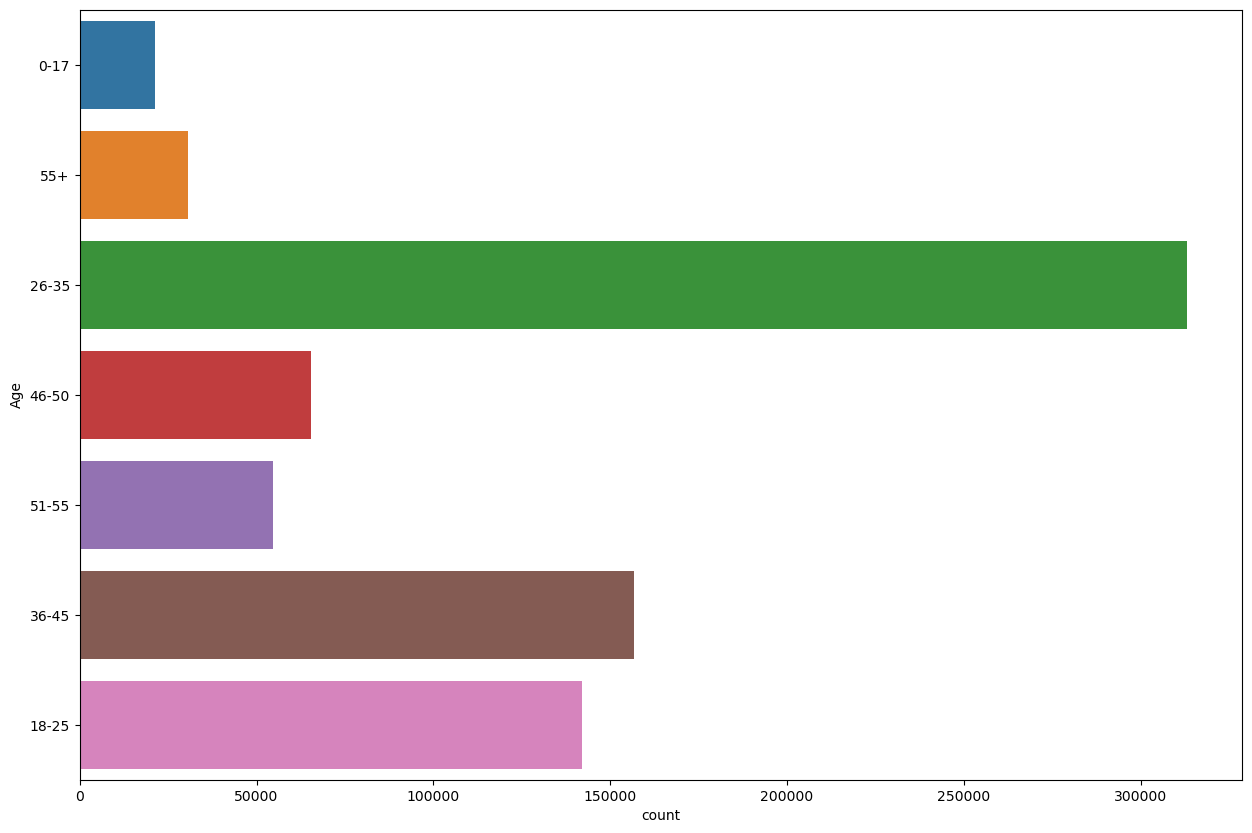

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(y = df['Age'])

<AxesSubplot:ylabel='Age'>

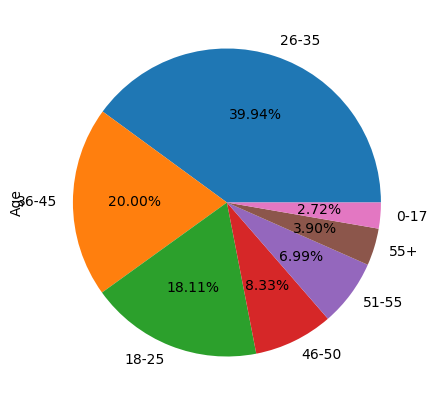

In [52]:
plt.figure(figsize=(7,5))
df['Age'].value_counts().plot.pie(autopct="%0.2f%%")

In [53]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='City_Category'>

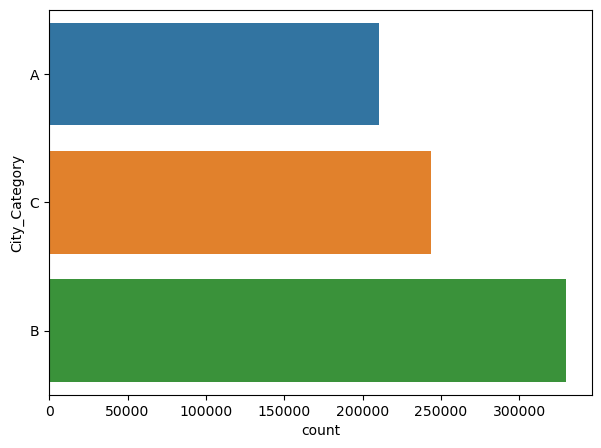

In [54]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['City_Category'])

<AxesSubplot:ylabel='City_Category'>

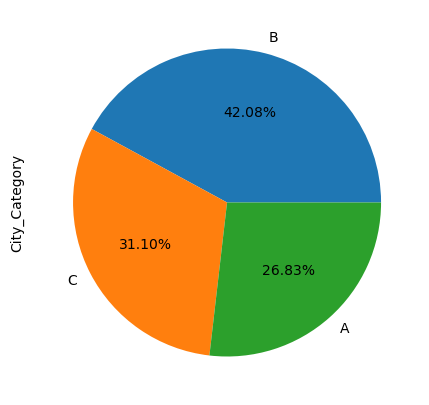

In [55]:
plt.figure(figsize=(7,5))
df['City_Category'].value_counts().plot.pie(autopct="%0.2f%%")

In [56]:
df['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Stay_In_Current_City_Years'>

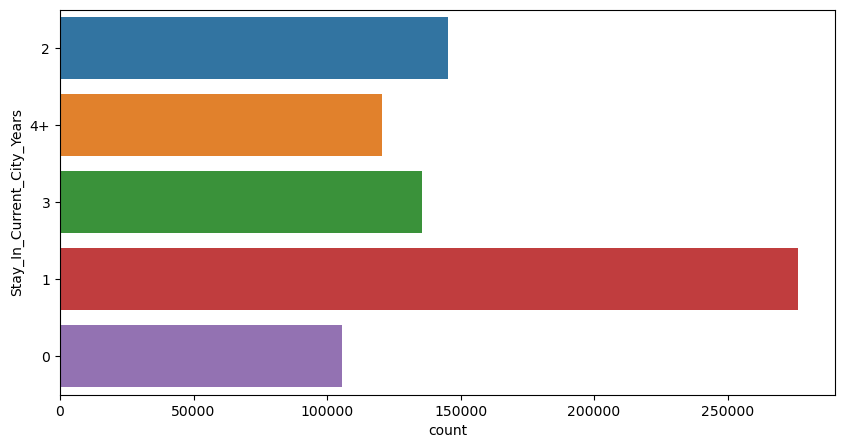

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(y = df['Stay_In_Current_City_Years'])

<AxesSubplot:ylabel='Stay_In_Current_City_Years'>

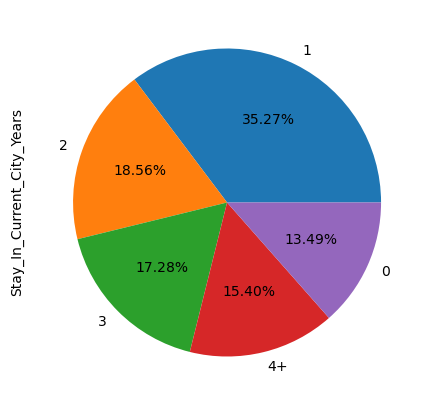

In [58]:
plt.figure(figsize=(7,5))
df['Stay_In_Current_City_Years'].value_counts().plot.pie(autopct="%0.2f%%")

# Tree Map

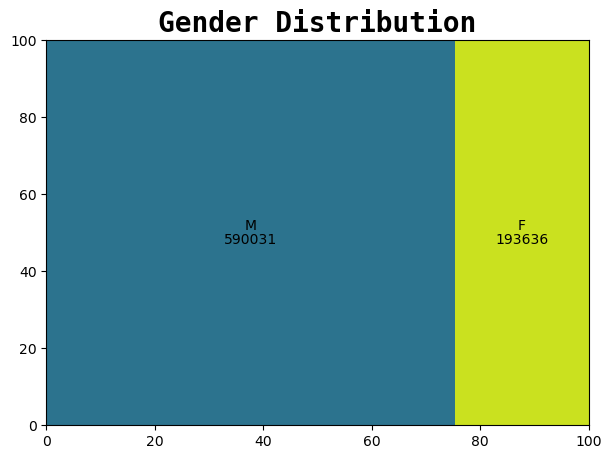

In [59]:
gender = df['Gender'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = gender.values, label = gender.index, value = gender.values)
plt.title('Gender Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

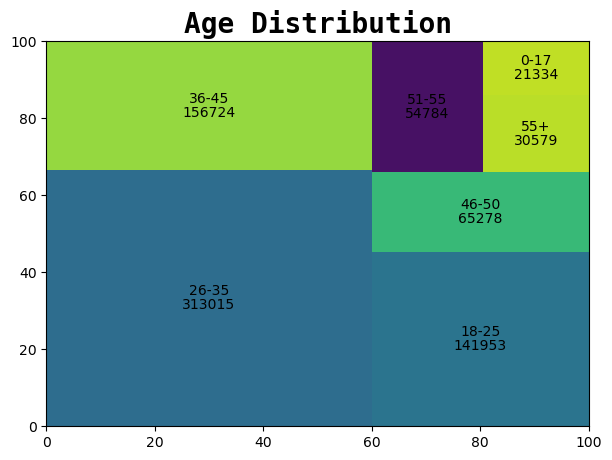

In [60]:
age = df['Age'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = age.values, label = age.index, value = age.values)
plt.title('Age Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

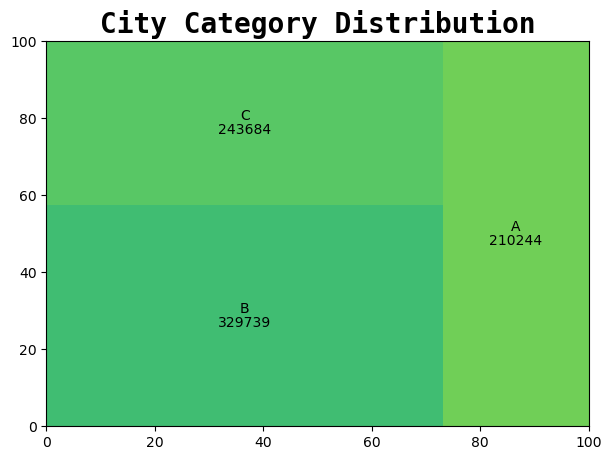

In [61]:
city_category = df['City_Category'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = city_category.values, label = city_category.index, value = city_category.values)
plt.title('City Category Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

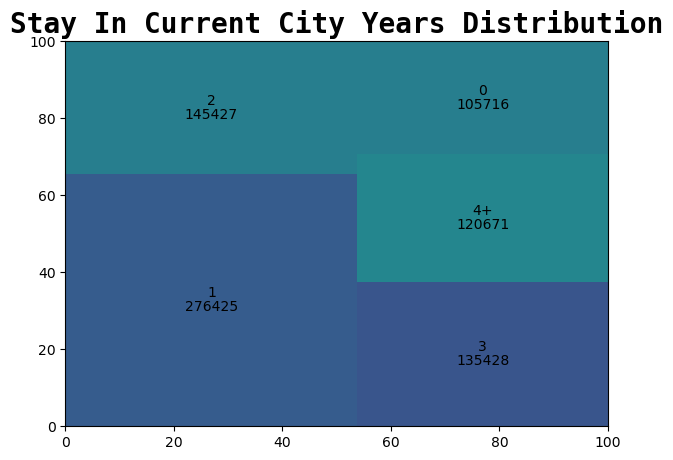

In [62]:
stay_in_current_city_years = df['Stay_In_Current_City_Years'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = stay_in_current_city_years.values, label = stay_in_current_city_years.index, 
              value = stay_in_current_city_years.values)
plt.title('Stay In Current City Years Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

In [63]:
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0       1  0-17          10             A                          2   
1       1  0-17          10             A                          2   
2       1  0-17          10             A                          2   
3       1  0-17          10             A                          2   
4       0   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   0                   0   
1               0                   1                   6                  14   
2               0                  12                   0                   0   
3               0                  12                  14                   0   
4               0                   8                   0                   0   

   Purchase  
0    8370.0  
1   15200.0  
2    1422.0  
3    1057.0  
4    7969.0

In [64]:
df['Age'] = df['Age'].map({'0-17': 17, '18-25': 22, '26-35': 31, '36-45': 41, '46-50': 48, 
                           '51-55': 54, '55+': 60})
df.head()

Gender  Age  Occupation City_Category Stay_In_Current_City_Years  \
0       1   17          10             A                          2   
1       1   17          10             A                          2   
2       1   17          10             A                          2   
3       1   17          10             A                          2   
4       0   60          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   0                   0   
1               0                   1                   6                  14   
2               0                  12                   0                   0   
3               0                  12                  14                   0   
4               0                   8                   0                   0   

   Purchase  
0    8370.0  
1   15200.0  
2    1422.0  
3    1057.0  
4    7969.0

In [65]:
df['City_Category'] = df['City_Category'].map({'A': 0, 'B': 1, 'C': 2})
df.head()

Gender  Age  Occupation  City_Category Stay_In_Current_City_Years  \
0       1   17          10              0                          2   
1       1   17          10              0                          2   
2       1   17          10              0                          2   
3       1   17          10              0                          2   
4       0   60          16              2                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   0                   0   
1               0                   1                   6                  14   
2               0                  12                   0                   0   
3               0                  12                  14                   0   
4               0                   8                   0                   0   

   Purchase  
0    8370.0  
1   15200.0  
2    1422.0  
3    1057.0  
4    7969.0

In [66]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, 
                                                                         '3': 3, '4+': 4}) 
                                                                    
df.head()

Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       1   17          10              0                           2   
1       1   17          10              0                           2   
2       1   17          10              0                           2   
3       1   17          10              0                           2   
4       0   60          16              2                           4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   0                   0   
1               0                   1                   6                  14   
2               0                  12                   0                   0   
3               0                  12                  14                   0   
4               0                   8                   0                   0   

   Purchase  
0    8370.0  
1   15200.0  
2    1422.0  
3    1057.0  
4    7969.0

# Area Plot

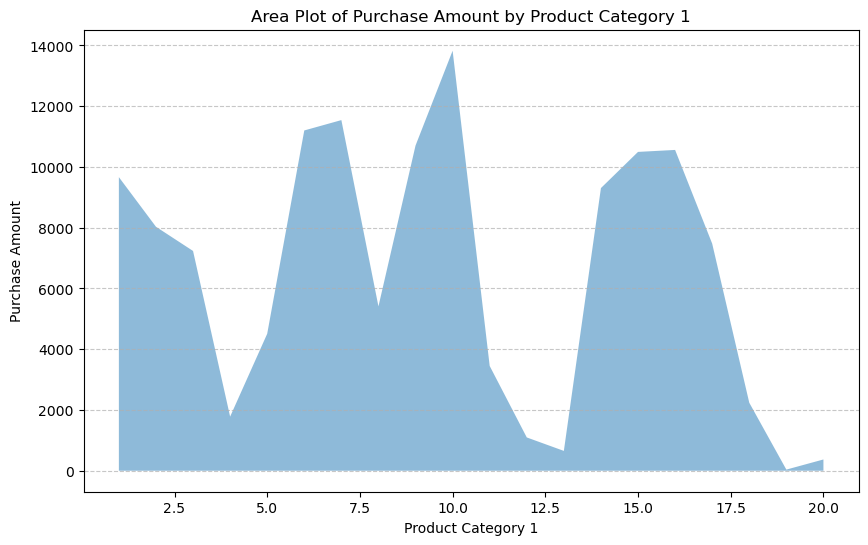

In [67]:
product_cat_1_purchase = df.groupby('Product_Category_1')['Purchase'].mean()
plt.figure(figsize = (10, 6))
plt.fill_between(product_cat_1_purchase.index, product_cat_1_purchase.values, alpha = 0.5)
plt.title('Area Plot of Purchase Amount by Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase Amount')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

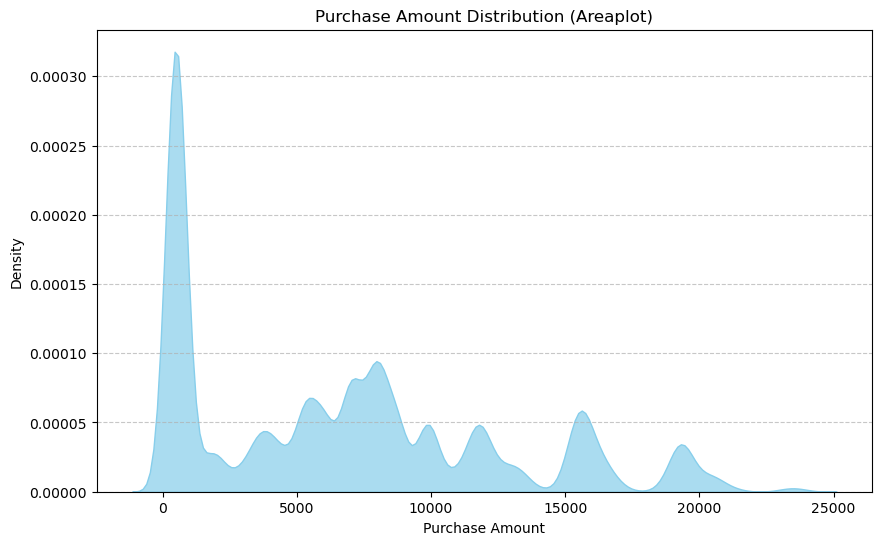

In [68]:
plt.figure(figsize = (10, 6))
sns.kdeplot(df['Purchase'], fill = True, color = 'skyblue', alpha = 0.7)
plt.title('Purchase Amount Distribution (Areaplot)')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

# Bar Plot

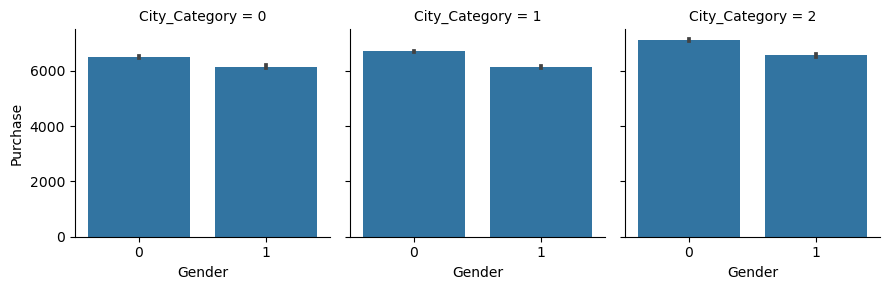

In [69]:
g = sns.FacetGrid(df, col = "City_Category")
g.map(sns.barplot, "Gender", "Purchase");

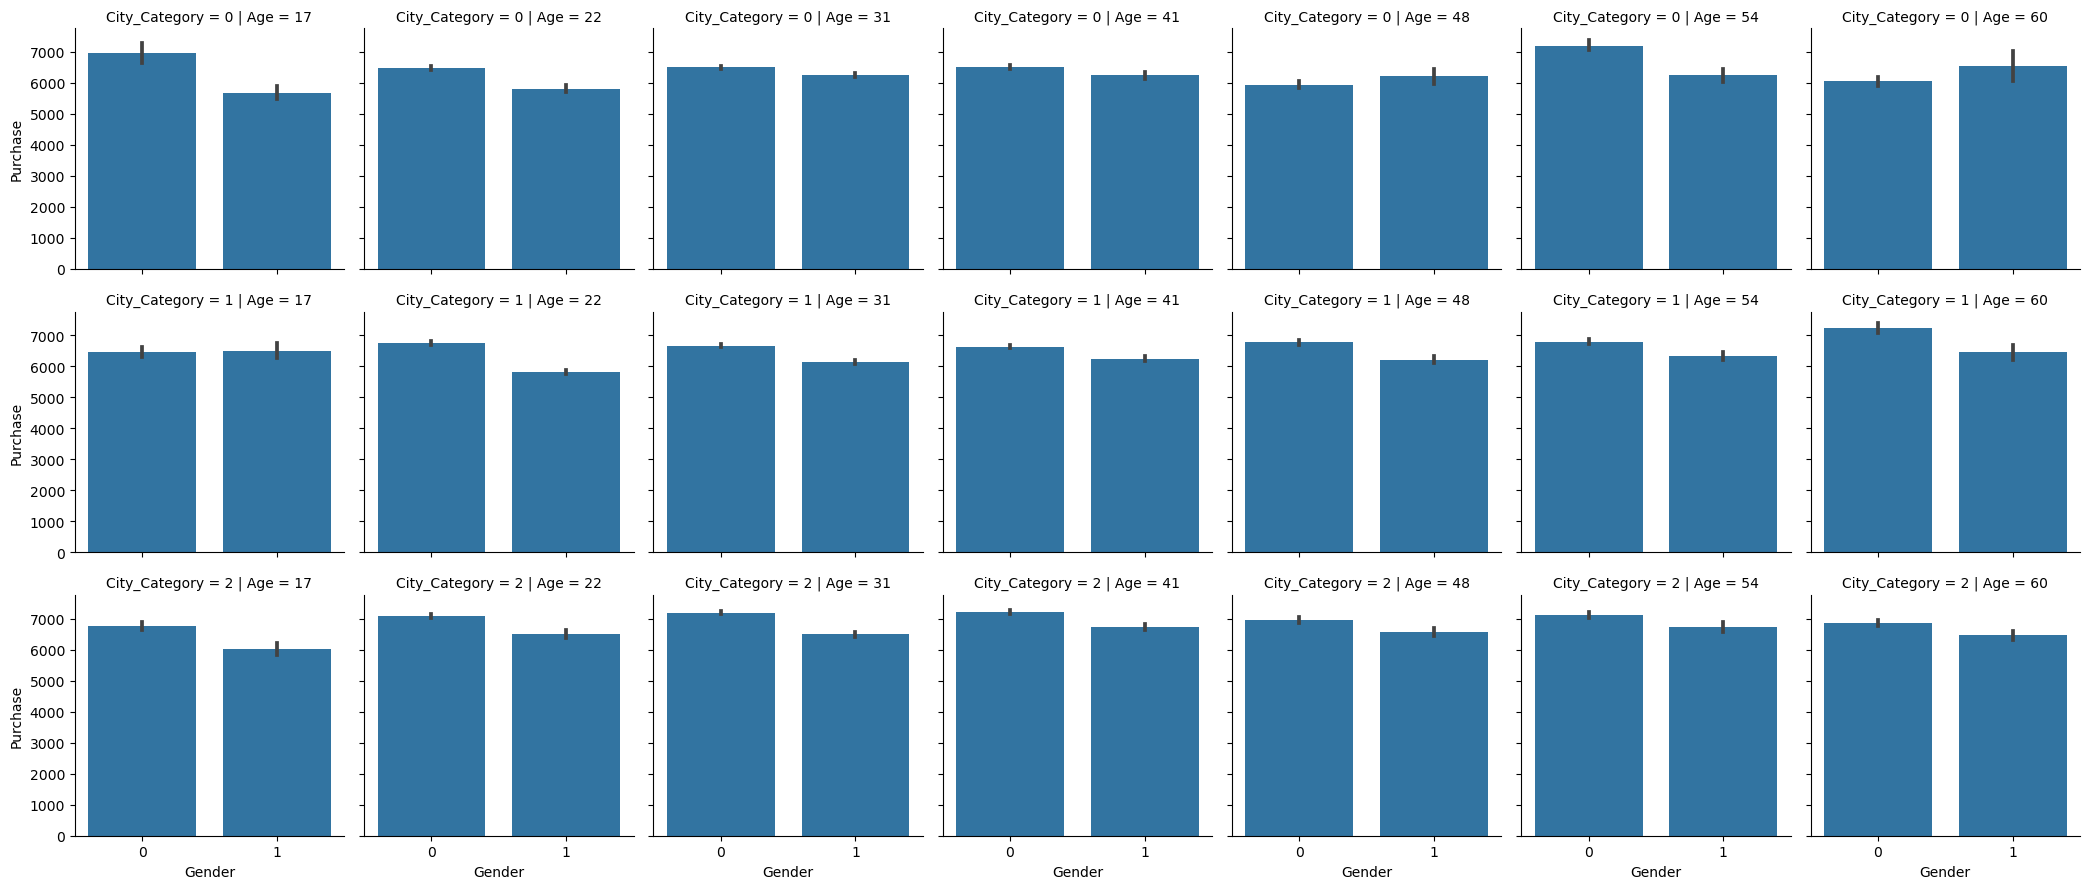

In [70]:
g = sns.FacetGrid(df, col = "Age", row = "City_Category")
g.map(sns.barplot, "Gender", "Purchase");

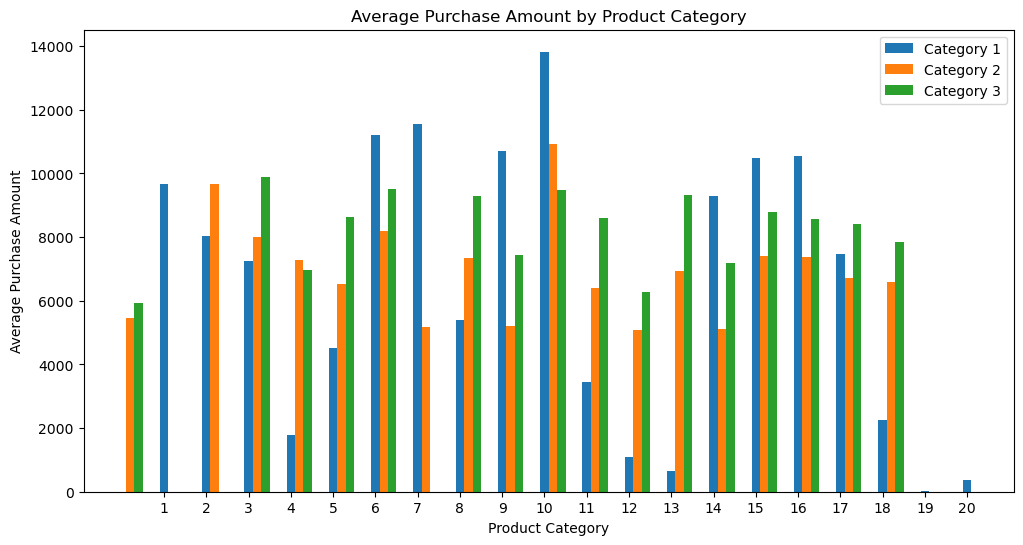

In [71]:
# Bar Plot: Product Categories vs. Purchase
plt.figure(figsize=(12, 6))
product_cat_1_purchase = df.groupby('Product_Category_1')['Purchase'].mean()
product_cat_2_purchase = df.groupby('Product_Category_2')['Purchase'].mean()
product_cat_3_purchase = df.groupby('Product_Category_3')['Purchase'].mean()
plt.bar(product_cat_1_purchase.index, product_cat_1_purchase.values, width = 0.2, 
        label = 'Category 1', align = 'center')
plt.bar(product_cat_2_purchase.index + 0.2, product_cat_2_purchase.values, width = 0.2, 
        label = 'Category 2', align = 'center')
plt.bar(product_cat_3_purchase.index + 0.4, product_cat_3_purchase.values, width = 0.2, 
        label = 'Category 3', align = 'center')
plt.title('Average Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.xticks(product_cat_1_purchase.index)
plt.legend()
plt.show()

# Box Plot

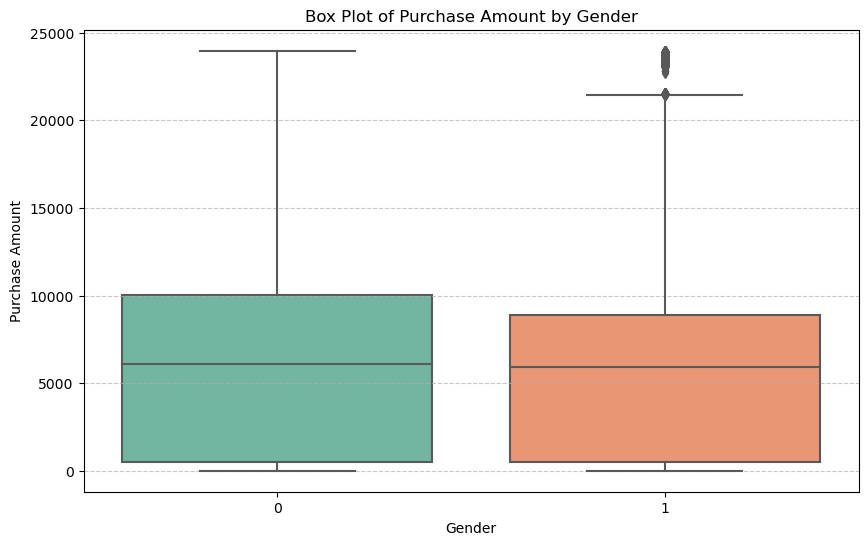

In [72]:
# Box Plot: Gender vs. Purchase
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Gender', y = 'Purchase', data = df, palette = 'Set2')
plt.title('Box Plot of Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

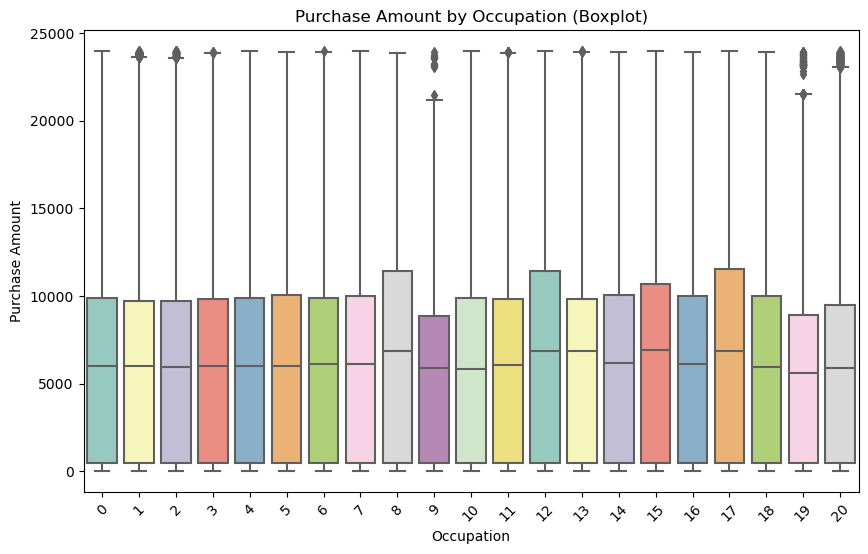

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'Occupation', y = 'Purchase', palette = 'Set3')
plt.title('Purchase Amount by Occupation (Boxplot)')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.xticks(rotation = 45)
plt.show()

# Dist Plot

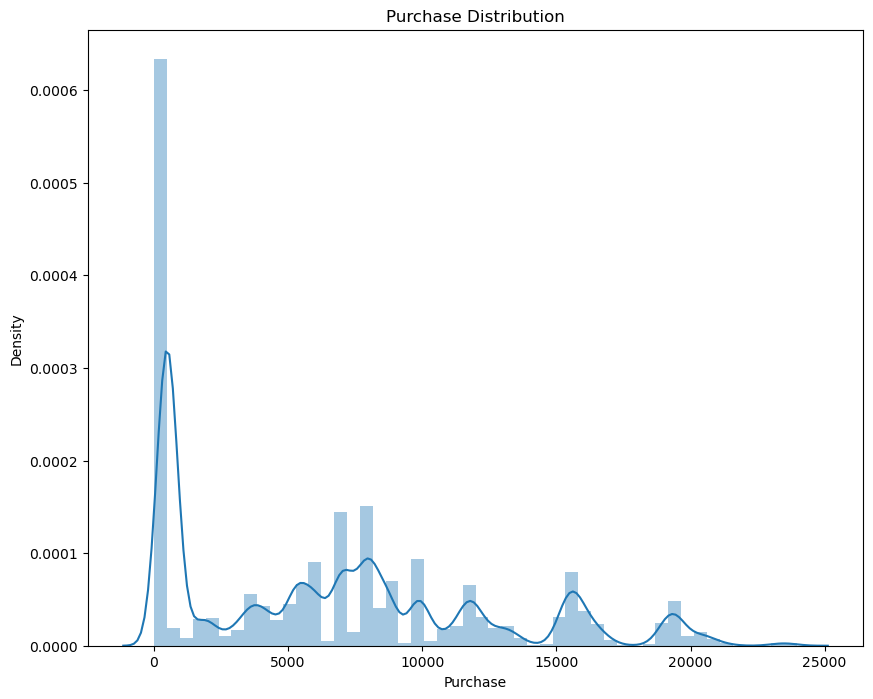

In [74]:
plt.figure(figsize=(10,8))
sns.distplot(df["Purchase"])
plt.title("Purchase Distribution")
plt.show()

# Hist Plot

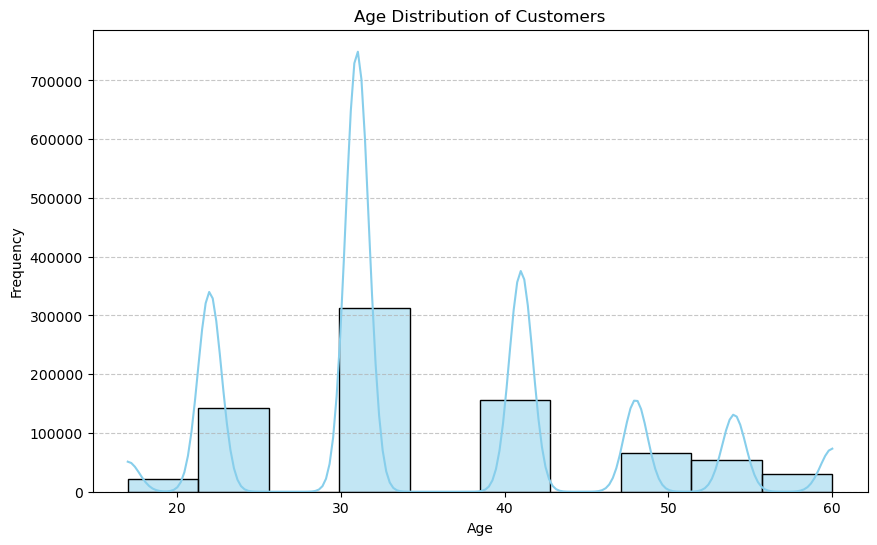

In [75]:
# Histogram (Hist Plot): Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Age', bins = 10, kde = True, color = 'skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

# Joint Plot

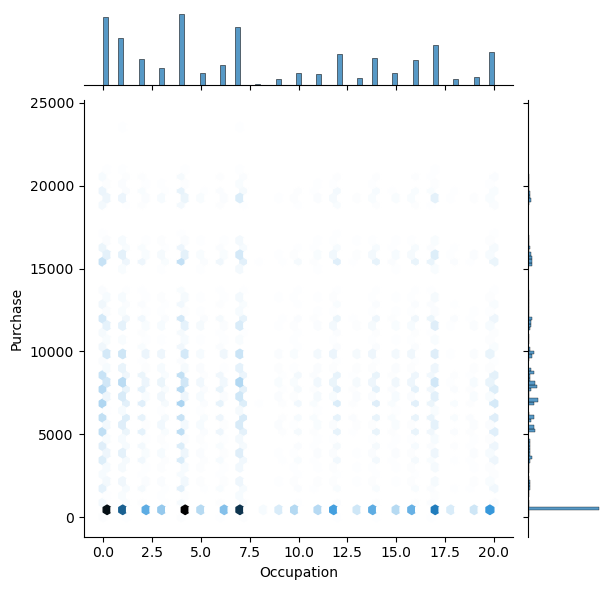

In [76]:
sns.jointplot(x = 'Occupation', y = 'Purchase', data = df, kind = 'hex')

# Line Plot

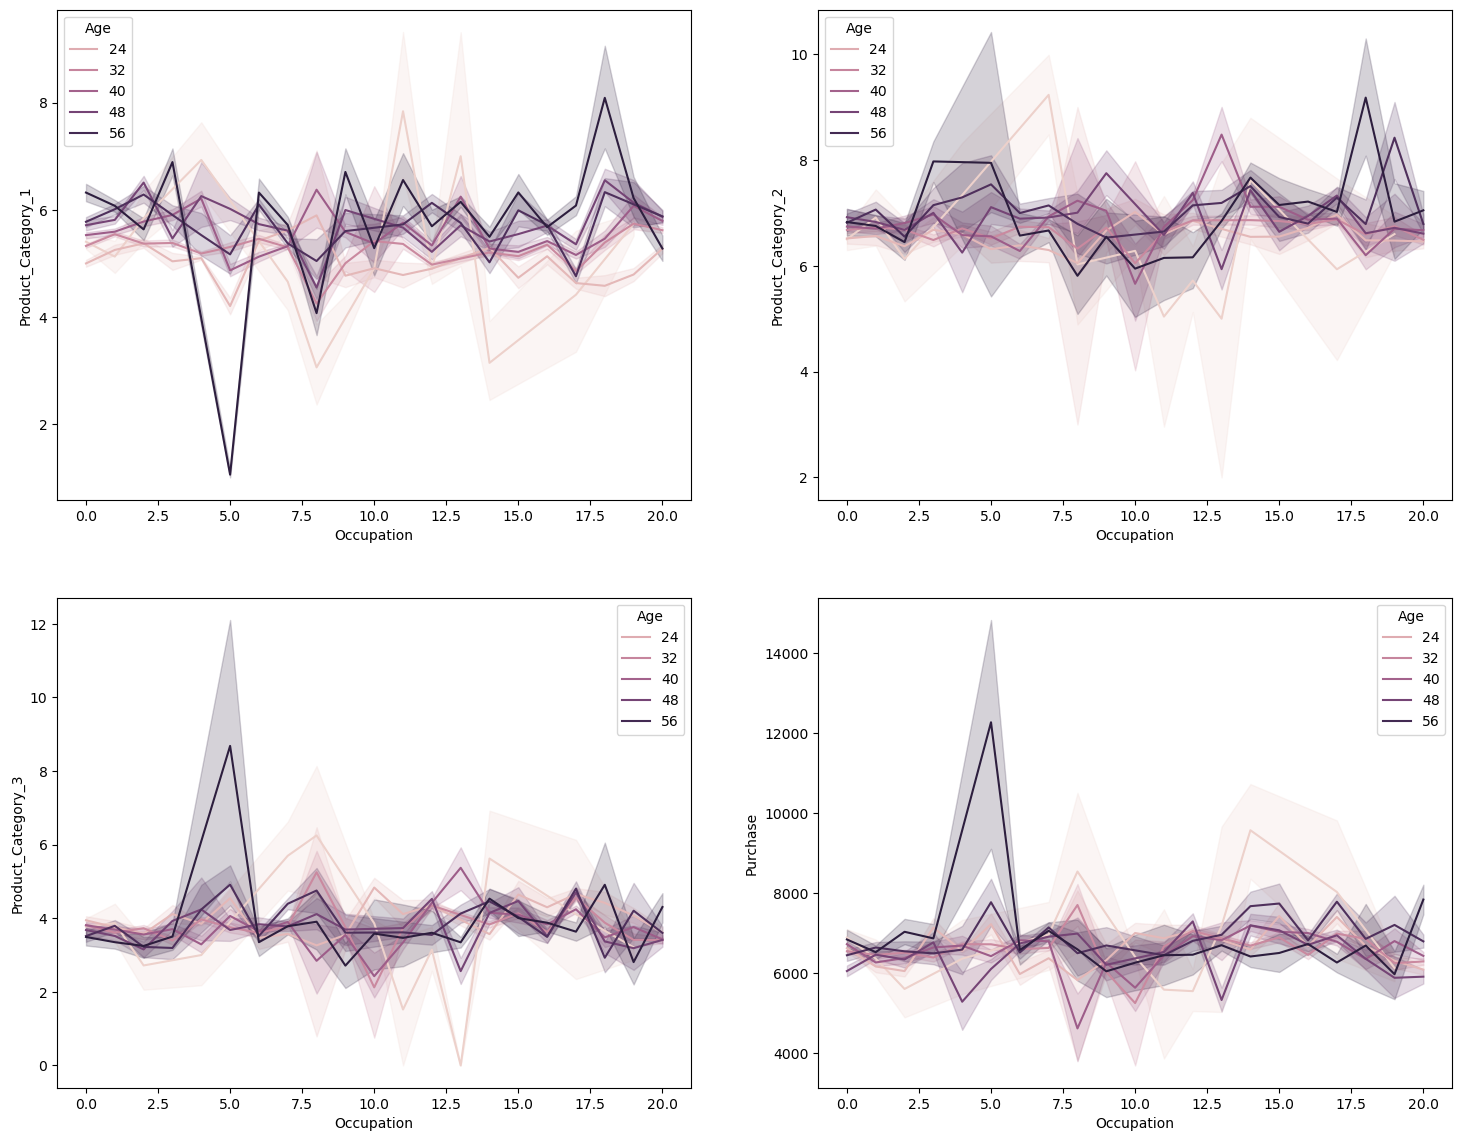

In [77]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize = (18,14))
ax = sns.lineplot(y = 'Product_Category_1', x = 'Occupation', hue = 'Age', data = df, ax = axes[0,0])
ax = sns.lineplot(y = 'Product_Category_2', x = 'Occupation', hue = 'Age', data = df, ax = axes[0,1])
ax = sns.lineplot(y = 'Product_Category_3', x = 'Occupation', hue = 'Age', data = df, ax = axes[1,0])
ax = sns.lineplot(y = 'Purchase', x = 'Occupation', hue = 'Age', data = df, ax = axes[1,1])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

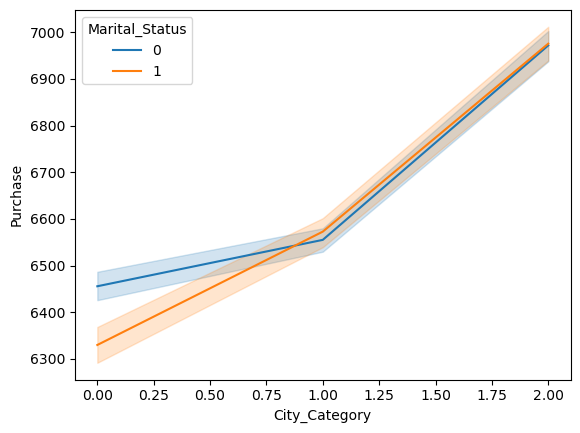

In [78]:
sns.lineplot(x = 'City_Category',y = 'Purchase',hue = 'Marital_Status', data = df)

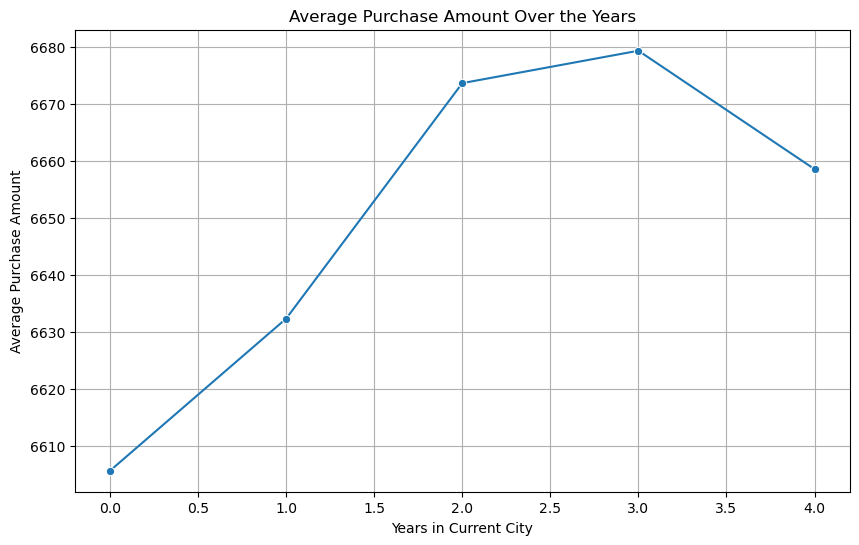

In [79]:
# Line Plot: Purchase over the Years
plt.figure(figsize=(10, 6))
yearly_purchase = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
sns.lineplot(x = yearly_purchase.index, y = yearly_purchase.values, marker = 'o')
plt.title('Average Purchase Amount Over the Years')
plt.xlabel('Years in Current City')
plt.ylabel('Average Purchase Amount')
plt.grid(True)
plt.show()

# Point Plot

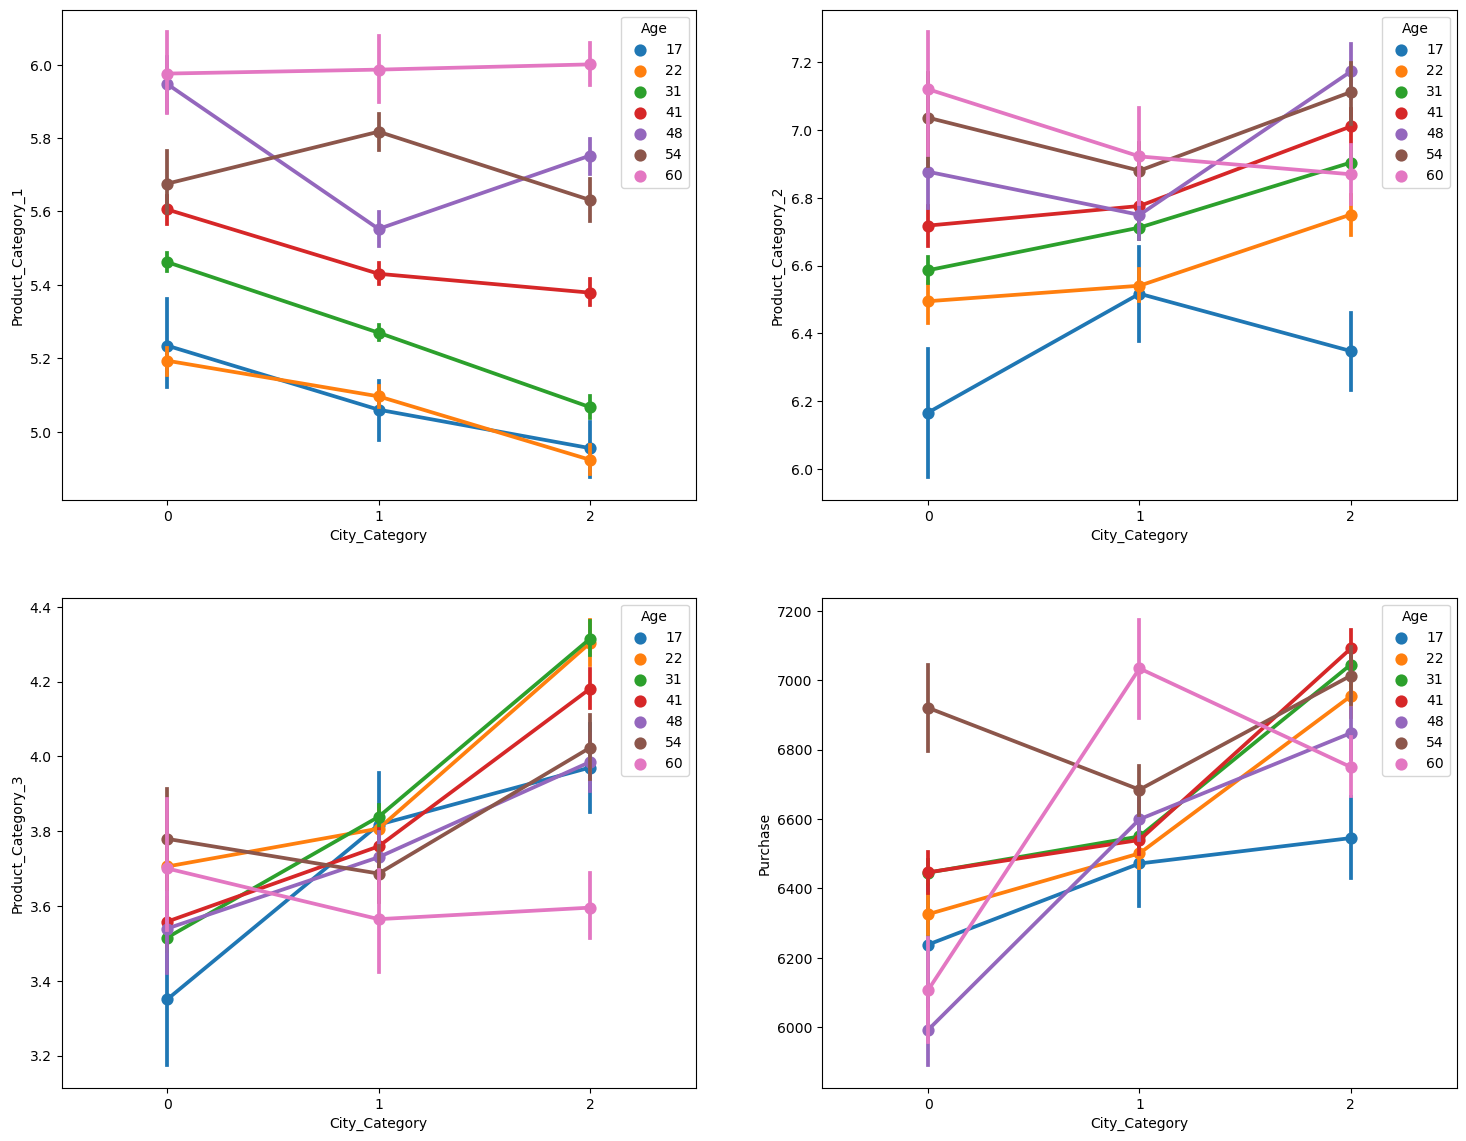

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y = 'Product_Category_1', x = 'City_Category',hue = 'Age',
                 data = df, ax = axes[0,0])
ax = sns.pointplot(y = 'Product_Category_2', x = 'City_Category',hue = 'Age',
                 data = df, ax = axes[0,1])
ax = sns.pointplot(y = 'Product_Category_3', x = 'City_Category', hue = 'Age',
                 data = df, ax = axes[1,0])
ax = sns.pointplot(y = 'Purchase', x = 'City_Category', hue = 'Age',
                 data = df, ax = axes[1,1])

# Radar Chart (Spider Plot)

In [81]:
product_categories = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
product_category_means = [df[category].mean() for category in product_categories]

fig = px.line_polar(r = product_category_means,theta = product_categories, line_close = True)

fig.update_traces(fill = 'toself')
fig.update_layout(title = 'Average Purchase Amount by Product Category (Radar Chart)')
fig.show()

# Scatter Plot

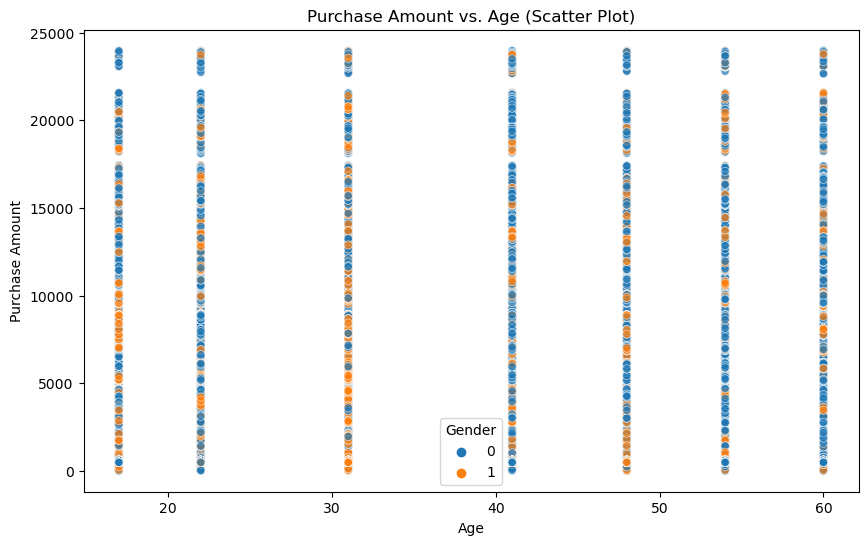

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', alpha = 0.7)
plt.title('Purchase Amount vs. Age (Scatter Plot)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

# Violin Plot

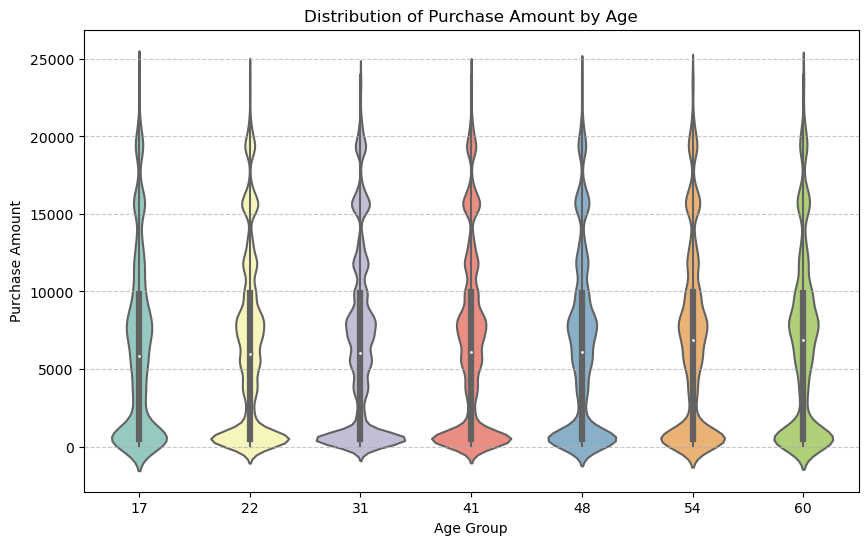

In [83]:
# Violin Plot: Age vs. Purchase
plt.figure(figsize=(10, 6))
sns.violinplot(x = 'Age', y = 'Purchase', data = df, palette = 'Set3')
plt.title('Distribution of Purchase Amount by Age')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

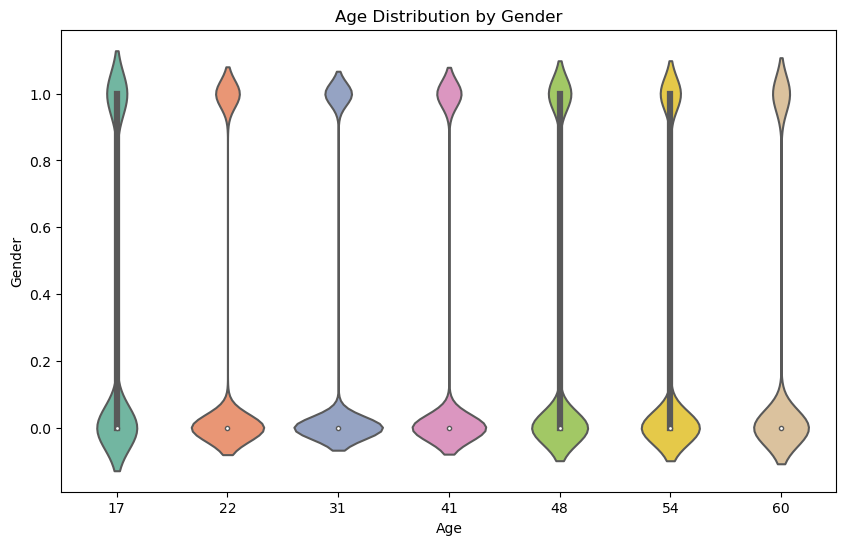

In [84]:
plt.figure(figsize=(10, 6))
sns.violinplot(data = df, x = 'Age', y = 'Gender', palette = 'Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

# 3D Plot

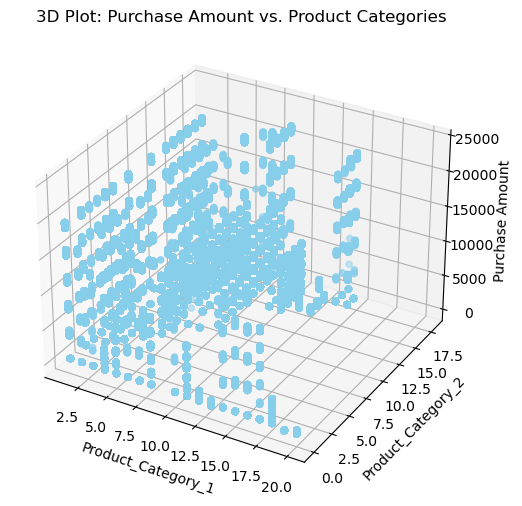

In [85]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['Product_Category_1'], df['Product_Category_2'], df['Purchase'], 
           c = 'skyblue', marker = 'o')
ax.set_xlabel('Product_Category_1')
ax.set_ylabel('Product_Category_2')
ax.set_zlabel('Purchase Amount')
ax.set_title('3D Plot: Purchase Amount vs. Product Categories')
plt.show()

# Train and Test

In [86]:
# Select features and target variable
X = df[['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
        'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
y = df['Purchase']

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [88]:
# Create and fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
lr_predictions = lr.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f'Linear Regression MSE: {lr_mse}')
print(f'Linear Regression R-squared: {lr_r2}')

Linear Regression MSE: 31938546.22308449
Linear Regression R-squared: 0.05347705634364619


# Decision Tree

In [89]:
# Create and fit a decision tree regressor model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
dt_predictions = dt.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f'Decision Tree MSE: {dt_mse}')
print(f'Decision Tree R-squared: {dt_r2}')

Decision Tree MSE: 33325173.969643917
Decision Tree R-squared: 0.012383295617606094


# Random Forest

In [90]:
# Create and fit a random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')

Random Forest MSE: 29314018.669814188
Random Forest R-squared: 0.13125691294942698


# Gradient Boosting Machines (GBM)

In [91]:
# Create and fit a gradient boosting regressor model
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions
gbm_predictions = gbm.predict(X_test)

# Evaluate the model
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)

print(f'Gradient Boosting Machines MSE: {gbm_mse}')
print(f'Gradient Boosting Machines R-squared: {gbm_r2}')

Gradient Boosting Machines MSE: 25901700.502511628
Gradient Boosting Machines R-squared: 0.2323835394980336


# XGBoost

In [92]:
# Create and fit an XGBoost regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f'XGBoost MSE: {xgb_mse}')
print(f'XGBoost R-squared: {xgb_r2}')

XGBoost MSE: 25684984.516034875
XGBoost R-squared: 0.23880608146423954
